In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

# 数据集清洗

In [38]:
# 清除Object类型的字段的前后空格
def clear_space(data):
    for col in data.columns:
        if data[col].dtype == 'O':
            data[col]=data[col].map(str.strip)   # 去除两边空格
    return data

In [39]:
dataset_raw = pd.read_csv("adultTest.csv")
dataset_raw = clear_space(dataset_raw)
pprint(dataset_raw.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')


# 整体了解

In [40]:
# 整体概况
def birdview(data):
    print("---整体数据概况---")
    print(data.shape)
    b = {}
    d = {}
    for col in data.columns:
        b[col] = len(data[col].unique())
        if len(list(data[col].unique()))<30:
            d[col] = str(data[col].unique())
        else:
            d[col] = "too much"
    r = pd.DataFrame(pd.Series(d),columns=['values'])\
            .join(pd.DataFrame(pd.Series(b),columns=['unique']))\
            .join(pd.DataFrame(data.dtypes,columns=['type']))\
            .join(pd.DataFrame(data.count(),columns=['count']))\
            .join(pd.DataFrame(data.isnull().sum(),columns=['isnull'])) 
    return r.sort_values(by=['values','type',])   

In [41]:
birdview(dataset_raw)

---整体数据概况---
(32561, 15)


,values,unique,type,count,isnull
class,['<=50K' '>50K'],2,object,32561,0
occupation,['Adm-clerical' 'Exec-managerial' 'Handlers-cl...,15,object,32561,0
education,['Bachelors' 'HS-grad' '11th' 'Masters' '9th' ...,16,object,32561,0
sex,['Male' 'Female'],2,object,32561,0
marital-status,['Never-married' 'Married-civ-spouse' 'Divorce...,7,object,32561,0
relationship,['Not-in-family' 'Husband' 'Wife' 'Own-child' ...,6,object,32561,0
workclass,['State-gov' 'Self-emp-not-inc' 'Private' 'Fed...,9,object,32561,0
race,['White' 'Black' 'Asian-Pac-Islander' 'Amer-In...,5,object,32561,0
education-num,[13 9 7 14 5 10 12 11 4 16 15 3 6 2 1 8],16,int64,32561,0
age,too much,73,int64,32561,0


In [42]:
def valueview(data):
    print("---定值数据概况---")
    return data.describe().T\
            .join(pd.DataFrame(data.skew(),columns=['skew']))\
            .join(pd.DataFrame(data.kurt(),columns=['kurt']))\
            .join(pd.DataFrame(data.dtypes,columns=['type']))\
            .join(pd.DataFrame(data.isnull().sum(),columns=['isnull']))

In [43]:
valueview(dataset_raw)

---定值数据概况---


,count,mean,std,min,25%,50%,75%,max,skew,kurt,type,isnull
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0,0.558743,-0.166127,int64,0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0,1.446980,6.218811,int64,0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0,-0.311676,0.623444,int64,0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0,11.953848,154.799438,int64,0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0,4.594629,20.376802,int64,0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0,0.227643,2.916687,int64,0


In [44]:
def catview(data):
    print("---定性数据概况---")
    for col in data.columns:
        if data[col].dtype == 'O':
            print(col+": "+str(len(data[col].unique()))+"个类别")
            pprint(dict(data[col].value_counts()))  

In [45]:
catview(dataset_raw.loc[:,['relationship']])

---定性数据概况---
relationship: 6个类别
{'Husband': 13193,
 'Not-in-family': 8305,
 'Other-relative': 981,
 'Own-child': 5068,
 'Unmarried': 3446,
 'Wife': 1568}


# 缺失值可视

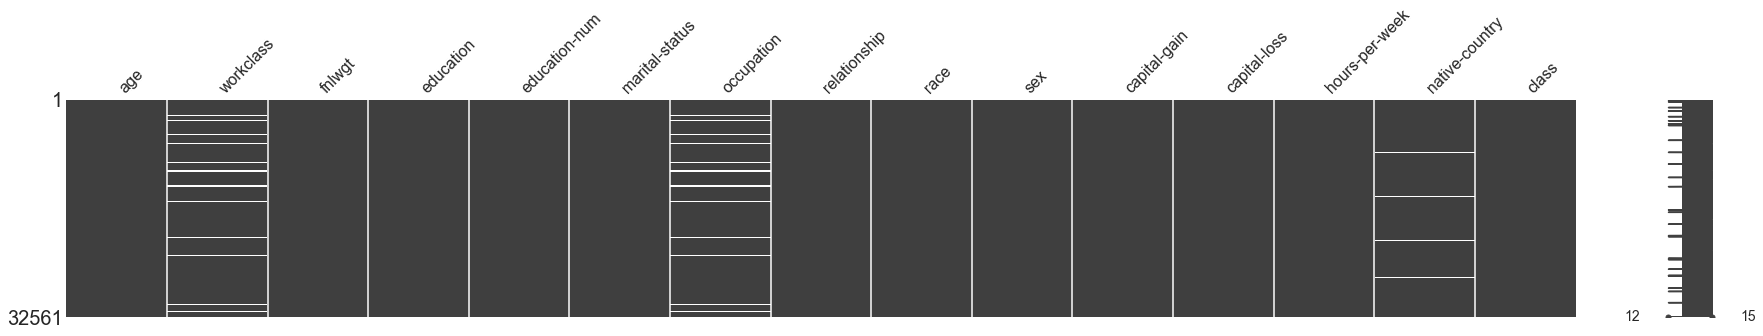

In [46]:
# 缺失值显示
import missingno
dataset_raw.loc[dataset_raw['workclass'] == '?', 'workclass'] = pd.NaT
dataset_raw.loc[dataset_raw['occupation'] == '?', 'occupation'] = np.NaN
dataset_raw.loc[dataset_raw['native-country'] == '?', 'native-country'] = pd.NaT
missingno.matrix(dataset_raw, figsize = (30,4))

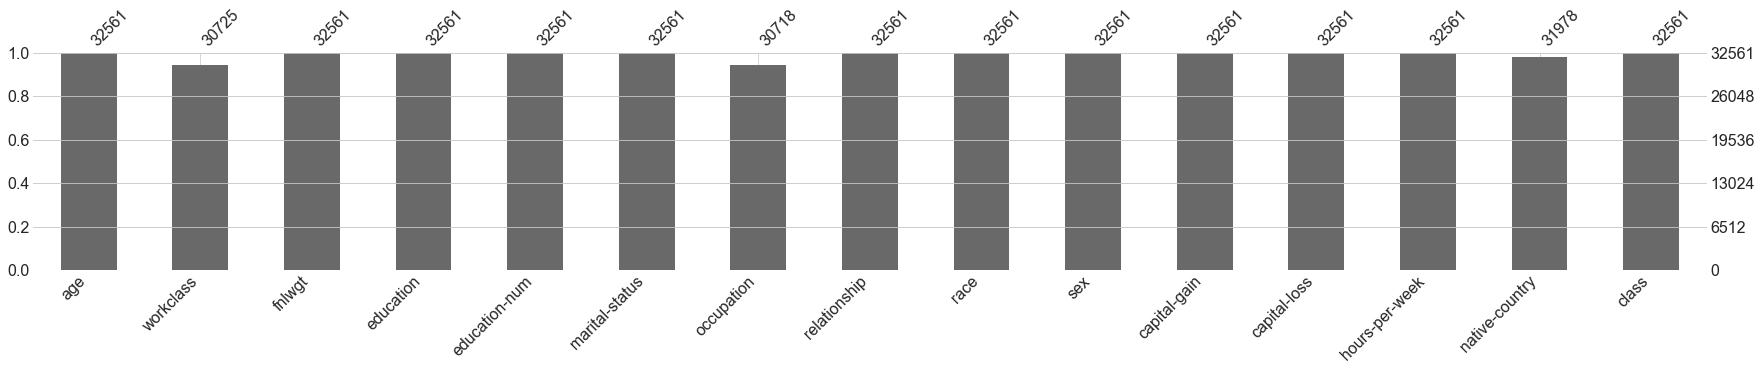

In [47]:
missingno.bar(dataset_raw, sort='ascending', figsize = (30,4))

# 单特征展示

In [1]:
import math
import matplotlib.pyplot as plt
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        # 定性
        if dataset.dtypes[column] == np.object: 
            g = sns.countplot(y=column, data=dataset)
#             substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
#             g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        # 定值
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

In [3]:
plot_distribution(dataset_raw,
                  cols=4, width=20, height=20, hspace=0.45, wspace=0.5)

NameError: name 'dataset_raw' is not defined

# 单特征处理

In [48]:
dataset_washed = dataset_raw.copy()

## 定性数据
重新梳理分类

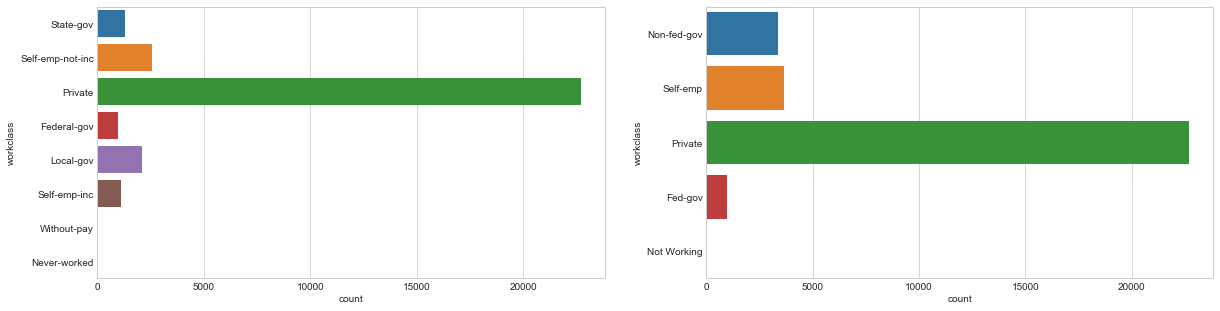

In [51]:
#左图是切分后的结果
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="workclass", data=dataset_raw);
plt.subplot(1, 2, 2)
sns.countplot(y="workclass", data=dataset_washed);

In [50]:
# 种类有些太多了，有些类似的要进行合并
dataset_washed['workclass'].replace({'Without-pay':'Not Working', 'Never-worked':'Not Working', 
                                     'State-gov':'Non-fed-gov', 'Local-gov':'Non-fed-gov',
                                     'Self-emp-not-inc':'Self-emp', 'Self-emp-inc':'Self-emp',
                                     'Federal-gov':'Fed-gov','?':pd.NaT},
                                    inplace=True)

## 定值数据
根据实际情况分箱——从定值变为定性

In [54]:
dataset_washed['hours-per-week'] = pd.cut(dataset_washed['hours-per-week'], 10)

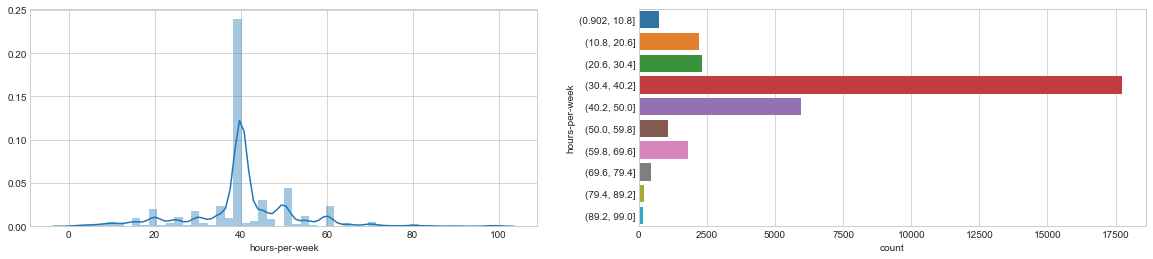

In [57]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
plt.subplot(1, 2, 1)
sns.distplot(dataset_raw['hours-per-week'])
plt.subplot(1, 2, 2)
sns.countplot(y="hours-per-week", data=dataset_washed)

# 双变量分析

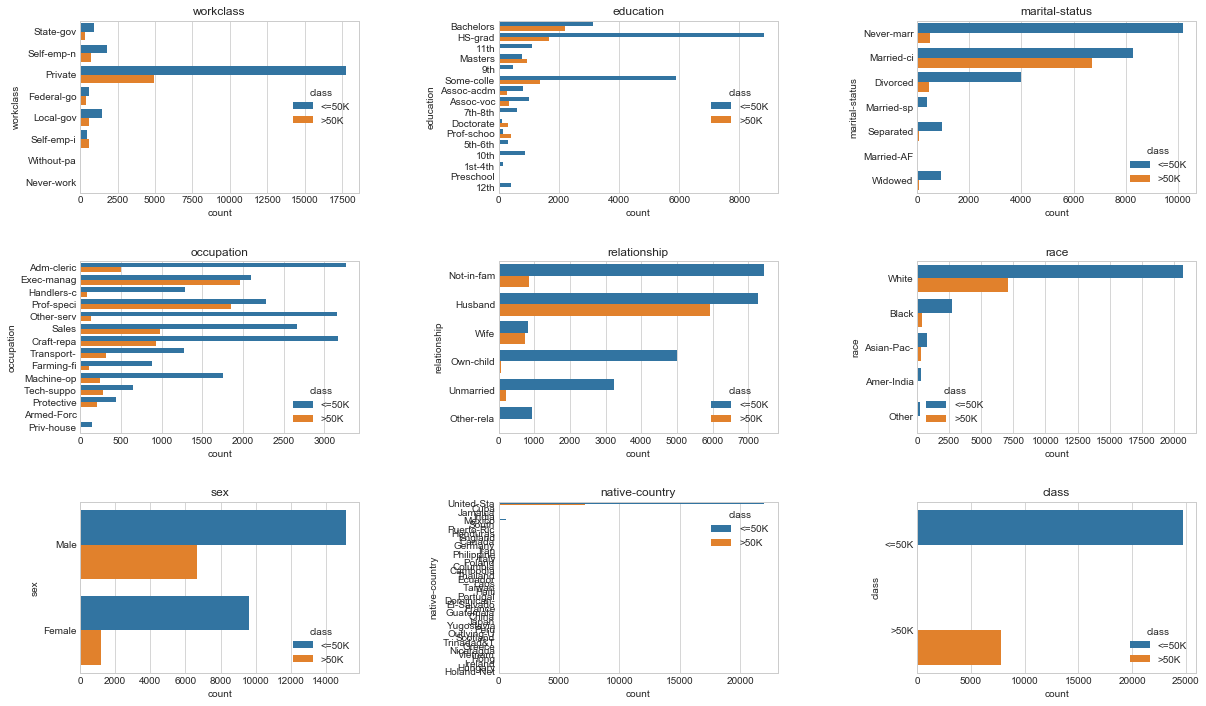

In [62]:
# 在不同类别属性上观察两种标签的分布情况
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        # 只要看定性的特征
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
plot_bivariate_bar(dataset_raw, hue='class', cols=3, width=20, height=12, hspace=0.4, wspace=0.5)